In [16]:
import numpy as np
import yfinance as yf
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt

In [17]:
tweet_dates = np.load("dates.npy", allow_pickle=True)
tweet_dates_sorted = np.sort(tweet_dates)
tweet_dates_sorted

array([datetime.datetime(2024, 5, 3, 18, 29, 2, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 3, 18, 54, 19, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 3, 19, 31, 26, tzinfo=datetime.timezone.utc),
       ...,
       datetime.datetime(2024, 5, 10, 20, 23, 17, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 10, 20, 33, 39, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 10, 20, 38, 36, tzinfo=datetime.timezone.utc)],
      dtype=object)

In [18]:
tesla = yf.Ticker("TSLA")

# Fetching historical data
tesla_data = tesla.history(start="2024-05-03", end="2024-05-11")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-03 00:00:00-04:00,182.100006,184.779999,178.419998,181.190002,75491500,0.0,0.0
2024-05-06 00:00:00-04:00,183.800003,187.559998,182.199997,184.759995,84390300,0.0,0.0
2024-05-07 00:00:00-04:00,182.399994,183.259995,177.399994,177.809998,75045900,0.0,0.0
2024-05-08 00:00:00-04:00,171.589996,176.059998,170.149994,174.720001,79969500,0.0,0.0
2024-05-09 00:00:00-04:00,175.009995,175.619995,171.369995,171.970001,65950300,0.0,0.0
2024-05-10 00:00:00-04:00,173.050003,173.059998,167.750000,168.470001,72627200,0.0,0.0


This gives a clear distinction: 5/3-5/7 is a high period and 5/8-5/10 is a low period.

In [19]:
# UTC time
cutoff_date = datetime(2024, 5, 8, 4, 0, 0, tzinfo=timezone('UTC'))
labels = np.zeros(len(tweet_dates))

for i, date in enumerate(tweet_dates):
    if date < cutoff_date:
        labels[i] = 1
    else:
        labels[i] = 0

In [20]:
tweet_dates

array([datetime.datetime(2024, 5, 10, 18, 9, 41, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 10, 17, 56, 4, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 10, 17, 28, 48, tzinfo=datetime.timezone.utc),
       ...,
       datetime.datetime(2024, 5, 10, 0, 16, 55, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 10, 0, 4, 38, tzinfo=datetime.timezone.utc),
       datetime.datetime(2024, 5, 10, 0, 3, 54, tzinfo=datetime.timezone.utc)],
      dtype=object)

In [21]:
print(labels[270:300])
print(labels[284])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.0


In [22]:
print(tweet_dates[284])
print(tweet_dates[285])

2024-05-08 04:07:29+00:00
2024-05-08 03:41:12+00:00


3911


Text(0.5, 1.0, 'Frequency of output labels, API data')

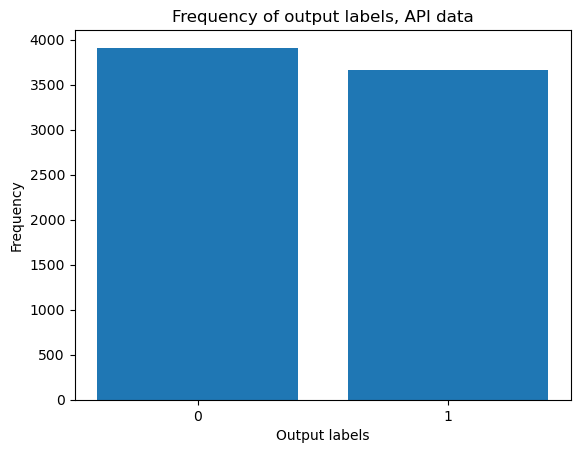

In [25]:
num_0 = len(np.where(labels == 0)[0])
num_1 = len(np.where(labels == 1)[0])

print(num_0)

plt.bar(["0", "1"], [num_0, num_1])
plt.xlabel("Output labels")
plt.ylabel("Frequency")
plt.title("Frequency of output labels, API data")

Text(0.5, 1.0, 'Frequency of API tweet post dates')

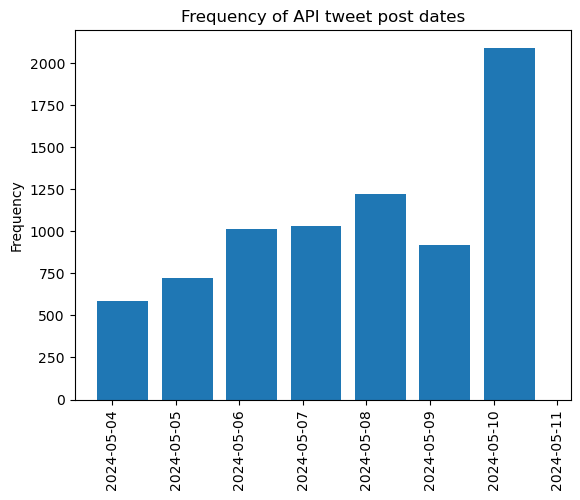

In [10]:
plt.hist(tweet_dates, bins=7, histtype='bar', width=0.8)
plt.tick_params(axis='x', labelrotation=90)
plt.ylabel("Frequency")
plt.title("Frequency of API tweet post dates")

In [11]:
np.save("labels.npy", labels)